In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import random as rnd
import os
import math

# required for interactive plotting
from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
import numpy.polynomial as np_poly

from IPython.display import Math
from IPython.display import Latex
from IPython.display import HTML

from pprint import pprint
import functools as ft

initialization
$
\newcommand{\Brace}[1]{\left\{#1\right\}}
\newcommand{\Bracket}[1]{\left[#1\right]}
\newcommand{\cases}[1]{\begin{cases}#1\end{cases}}
\newcommand{\cov}[1]{\text{cov} \sigma\left[#1\right]}
\newcommand{\diff}[2]{\frac{d #1}{d #2}}
\newcommand{\difftwo}[2]{\frac{d^2 #1}{d {#2}^2}}
\newcommand{\diffn}[2]{{#1}^{\prime}(#2)}
\newcommand{\E}[1]{\mathbb{E}\left[ #1 \right]}
\newcommand{\expb}[1]{\exp\left\{#1\right\}} 
\newcommand{\EXP}[1]{\exp\left\{#1\right\}} 
\newcommand{\frachalf}[1]{\frac{#1}{2}~}
\newcommand{\fracone}[1]{\frac{1}{#1}~}
\newcommand{\fracrec}[1]{\frac{1}{#1}~}
\newcommand{\half}{\fracone{2}}
\newcommand{\H}[1]{\mathbb{H}\left[#1\right]}
\newcommand{\Int}[2]{\displaystyle \int_{#1}^{#2}~}
\newcommand{\intinfinf}{\Int{-\infty}{\infty}}
\newcommand{\inv}[1]{#1^{-1}}
\newcommand{\invp}[1]{\left({#1}\right)^{-1}}
\newcommand{\KL}[2]{\text{KL}\left(#1 \Vert #2\right)}
\newcommand{\Lim}[1]{\displaystyle \lim_{#1}}
\newcommand{\Ln}[1]{\ln \left\(#1\right\)}
\newcommand{\Lnb}[1]{\ln \left\{#1\right\} }
\newcommand{\Mod}[1]{\left|#1\right|}
\newcommand{\Norm}[1]{\left\lVert #1 \right\rVert}
\newcommand{\Normsqr}[1]{\Norm{#1}^2}
\newcommand{\map}[1]{#1_{\text{MAP}}}
\newcommand{\ml}[1]{#1_{\text{ML}}}
\newcommand{\MI}[1]{\mathcal{I}\left(#1\right)}
\newcommand{\P}{\mathbb{P}}
\newcommand{\Paran}[1]{\left(#1\right)}
\newcommand{\Partial}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\sqrbrkt}[1]{\Bracket{#1}^2}
\newcommand{\sqrbrc}[1]{\Brace{#1}^2}
\newcommand{\trace}[1]{\text{Tr}\left( #1 \right)}
\newcommand{\traceb}[1]{\text{Tr}\left\{#1\right\}}
\newcommand{\underl}[1]{\text{$\underline{#1}$}}
\newcommand{\V}[1]{\mathbb{V}\left[#1\right]}
$
$
\DeclareMathOperator*{\argmin}{arg\,min}
\DeclareMathOperator*{\argmax}{arg\,max}
$
$
\newcommand{\mat}[1]{ \left[ \begin{matrix} #1 \end{matrix} \right] }
\newcommand{\matp}[1]{ \left( \begin{matrix} #1 \end{matrix} \right)}
\newcommand{\mats}[1]{ \begin{matrix}#1\end{matrix} }
\newcommand{\arrthree}[1]{
\begin{array}{rlr} #1 \end{array}}
$

$
\newcommand{\C}{\mathbb{C}}
\newcommand{\Ca}{\mathcal{C}}
\newcommand{\Caone}{\Ca_1}
\newcommand{\Catwo}{\Ca_2}
\newcommand{\Cak}{\Ca_k}
\newcommand{\D}{\mathcal{D}}
\newcommand{\G}{\mathcal{G}}
\newcommand{\I}{\mathcal{I}}
\newcommand{\L}{\mathcal{L}}
\newcommand{\M}{\mathcal{M}}
\newcommand{\N}{\mathbb{N}}
\newcommand{\R}{\mathbb{R}}
\newcommand{\Ra}{\mathcal{R}}
$
$
\newcommand{\commentgray}[1]{\color{gray}{\text{#1}}}
$

sum, product
$
\newcommand{\sumi}{\displaystyle \sum_i}
\newcommand{\sumiD}{\displaystyle \sum_{i=1}^{D}}
\newcommand{\sumiL}{\displaystyle \sum_{i=1}^{L}}
\newcommand{\sumiN}{\displaystyle \sum_{i=1}^{N}}
\newcommand{\sumjD}{\displaystyle \sum_{j=1}^{D}}
\newcommand{\sumjK}{\displaystyle \sum_{j=1}^{K}}
\newcommand{\sumjMl}{\sum_{j=1}^{M-1}}
\newcommand{\sumkK}{\displaystyle \sum_{k=1}^{K}}
\newcommand{\sumkM}{\displaystyle \sum_{k=1}^{M}}
\newcommand{\sumkMl}{\sum_{k=1}^{M-1}}
\newcommand{\summN}{\displaystyle \sum_{m=1}^{N}}
\newcommand{\sumnN}{\displaystyle \sum_{n=1}^{N}}
$
$
\newcommand{\prodi}{\displaystyle \prod_i}
\newcommand{\prodiD}{\displaystyle \prod_{i=1}^{D}}
\newcommand{\prodiL}{\displaystyle \prod_{i=1}^{L}}
\newcommand{\prodiN}{\displaystyle \prod_{i=1}^{N}}
\newcommand{\prodjK}{\displaystyle \prod_{j=1}^{K}}
\newcommand{\prodkK}{\displaystyle \prod_{k=1}^{K}}
\newcommand{\prodmN}{\displaystyle \prod_{m=1}^{N}}
\newcommand{\prodnN}{\displaystyle \prod_{n=1}^{N}}
$

alphabet shortcuts
$
\newcommand{\ab}{\mathbf{a}}
\newcommand{\at}{\ab^T}
\newcommand{\Ab}{\mathbf{A}}
\newcommand{\At}{\Ab^T}
\newcommand{\Ai}{\inv{\Ab}}
\newcommand{\Abjk}{\Ab_{jk}}
\newcommand{\bb}{\mathbf{b}}
\newcommand{\bt}{\bb^T}
\newcommand{\Bb}{\mathbf{B}}
\newcommand{\Bt}{\Bb^T}
\newcommand{\Cb}{\mathbf{C}}
\newcommand{\Db}{\mathbf{D}}
\newcommand{\fb}{\mathbf{f}}
\newcommand{\fp}{f^{\prime}}
\newcommand{\Hb}{\mathbf{H}}
\newcommand{\hx}{h(\xb)}
\newcommand{\Jb}{\mathbf{J}}
\newcommand{\kb}{\mathbf{k}}
\newcommand{\Kb}{\mathbf{K}}
\newcommand{\Lb}{\mathbf{L}}
\newcommand{\Lt}{\Lb^T}
\newcommand{\Lbi}{\Lb^{-1}}
\newcommand{\mb}{\mathbf{m}}
\newcommand{\mt}{\mb^T}
\newcommand{\mbn}{\mb_N}
\newcommand{\mbnt}{\mbn^T}
\newcommand{\mbN}{\mb_N}
\newcommand{\mbNt}{\mbn^T}
\newcommand{\Mb}{\mathbf{M}}
\newcommand{\Qb}{\mathbf{Q}}
\newcommand{\Rb}{\mathbf{R}}
\newcommand{\sb}{\mathbf{s}}
\newcommand{\Sb}{\mathbf{S}}
\newcommand{\tb}{\mathbf{t}}
\newcommand{\tt}{\tb^T}
\newcommand{\Tb}{\mathbf{T}}
\newcommand{\Tt}{\Tb^T}
\newcommand{\ub}{\mathbf{u}}
\newcommand{\Ub}{\mathbf{U}}
\newcommand{\Ut}{\Ub^T}
\newcommand{\vb}{\mathbf{v}}
\newcommand{\Vb}{\mathbf{V}}
\newcommand{\wb}{\mathbf{w}}
\newcommand{\wnr}[1]{\wb^{(\text{#1})}}
\newcommand{\wt}{\wb^T}
\newcommand{\Wb}{\mathbf{W}}
\newcommand{\Wt}{\Wb^T}
\newcommand{\Wtilde}{\widetilde{\Wb}}
\newcommand{\Wtildet}{\Wtilde^T}
\newcommand{\Xb}{\mathbf{X}}
\newcommand{\Xt}{\Xb^T}
\newcommand{\Xtilde}{\widetilde{\Xb}}
\newcommand{\Xtildet}{\Xtilde^T}
\newcommand{\xb}{\mathbf{x}}
\newcommand{\xt}{\xb^T}
\newcommand{\xtilde}{\widetilde{\xb}}
\newcommand{\xtilden}{\xtilde_n}
\newcommand{\xtildent}{\xtilden^T}
\newcommand{\xp}{x^{\prime}}
\newcommand{\xbp}{\xb^{\prime}}
\newcommand{\xbm}{\xb_m}
\newcommand{\xbn}{\xb_n}
\newcommand{\xab}{\mathbf{x_a}}
\newcommand{\xabt}{\mathbf{x_a}^T}
\newcommand{\xbb}{\mathbf{x_b}}
\newcommand{\xbbt}{\mathbf{x_b}^T}
\newcommand{\yb}{\mathbf{y}}
\newcommand{\yt}{\yb^T}
\newcommand{\yx}{y(\xb)}
\newcommand{\zb}{\mathbf{z}}
\newcommand{\zt}{\zb^T}
\newcommand{\zbm}{\zb_m}
\newcommand{\zbn}{\zb_n}
\newcommand{\zbnp}{\zb_{n-1}}
\newcommand{\znk}{\zb_{nk}}
\newcommand{\znpj}{\zb_{n-1,j}}
\newcommand{\Zb}{\mathbf{Z}}
$

math shortcuts
$
\newcommand{\chib}{\boldsymbol{\chi}}
\newcommand{\etab}{\pmb{\eta}}
\newcommand{\etat}{\eta^T}
\newcommand{\etabt}{\etab^T}
\newcommand{\Lambdab}{\pmb{\Lambda}}
\newcommand{\laa}{\Lambda_{aa}}
\newcommand{\laai}{\Lambda_{aa}^{-1}}
\newcommand{\lab}{\Lambda_{ab}}
\newcommand{\lba}{\Lambda_{ba}}
\newcommand{\lbb}{\Lambda_{bb}}
\newcommand{\lbbi}{\Lambda_{bb}^{-1}}
\newcommand{\li}{\Lambda^{-1}}
\newcommand{\Li}{\Lambda^{-1}}
\newcommand{\mub}{\pmb{\mu}}
\newcommand{\mut}{\mub^T}
\newcommand{\muab}{\pmb{\mu}_a}
\newcommand{\mubb}{\pmb{\mu}_b}
\newcommand{\Phib}{\pmb{\Phi}}
\newcommand{\Phibt}{\Phib^T}
\newcommand{\pib}{\pmb{\pi}}
\newcommand{\sigmasqr}{\sigma^2}
\newcommand{\saa}{\Sigma_{aa}}
\newcommand{\sab}{\Sigma_{ab}}
\newcommand{\sba}{\Sigma_{ba}}
\newcommand{\sbb}{\Sigma_{bb}}
\newcommand{\Sigmai}{\inv{\Sigma}}
\newcommand{\thetab}{\pmb{\theta}}
\newcommand{\thetat}{\thetab^T}
\newcommand{\thetabh}{\hat{\thetab}}
\newcommand{\thetaold}{\thetab^{\text{old}}}
$
$
\newcommand{\zerob}{\pmb{0}}
\newcommand{\ed}{\mathbb{E}_{\D}}
\newcommand{\edyx}{\ed\left[y(\xb ; \D)\right]}
\newcommand{\dx}{~dx}
\newcommand{\dxb}{~d\xb}
\newcommand{\pxdxb}{p(\xb) \dxb}
\newcommand{\dwb}{~d\wb}
$

aliases for distributions
$\newcommand{\multivarcoeff}{\frac{1}{(2\pi)^{D/2}}
\frac{1}{\left| \mathbf{\Sigma}\right|^{1/2}}}$
$\newcommand{\multivarexp}[2]
{
\left\{
 -\frac{1}{2} 
 {#1}^T 
 #2
 {#1}
\right\}
}$
$\newcommand{\multivarexpx}[1]{\multivarexp{#1}{\Sigma^{-1}}}$
$\newcommand{\multivarexpstd}{\multivarexpx{(\xb-\mub)}}$
$\newcommand{\gam}{\operatorname{Gam}}$
$
\newcommand{\Nl}[3]{\mathcal{N}\left(#1 \mid #2, #3\right)}
\newcommand{\Nstdx}{\Nl{\mathbf{x}}{\mathbf{\mu}}{\Sigma}}
$

one of the choices for the basis functions for linear regression models would be radial basis, given by
$$
\phi_j(\xb) = h(\Norm{\xb - \mu_j})
$$

# Why rbf?

##  Exact function interpolation

\citeme{Powell, 1987}

## Green's functions

\citeme{Poggio and Girosi, 1990}

## Noisy input variables

\citeme{Webb, 1994}

# Computational considerations

One basis function for each data point which becomes costly while making predictions.

\citeme{Broomhead and Lowe, 1988; Moody and Darken, 1989; Poggio and Girosi, 1990}  
Models which retain the expansion in rbf's but where number of basis functions  < number of data points

The number of basis functions and the locations of their centers are determined just from the data set. the basis functions are then kept fixed and the coefficients $\wb_i$ are determined using least squares using the normal, time-tested boring way as was discussed in linear regression models.

## orthogonal least squares

\citeme{Che et. al, 1991}

A sequential selection process in which at each step the next data point to be chosen as a basis function centre corresponds to the one that gives the greatest reduction in the sum-of-squares error.

Values for the expansion coefficients are determined as part of the algorithm. Clustering algorithms such as K-means have also been used, which give a set of basis function centres that no longer coincide with training data points.


# Nadaraya-Watson model

THe prediction of a linear regression model for a new input x takes the form of a linear combination of the training set target values with coefficients given by the equivalent kernel satisfies the summation constraint

[here](../linear-models-for-regression/bayesian-linear-regression.ipynb#Equivalent-Kernel)
$$
y(\xb,\mbN) = \sumnN k(\xb,\xb_n) t_n
$$

## different perspective

lets consider kernel density estimation. say we have a training set $\Brace{\xb_n, t_n}$.  

lets use a Parzen density estimator to model the joint distribution $p(\xb, t)$ so that
$$
p(\xb, t) = \fracrec{N} \sumnN f(\xb - \xbn, t-t_n)
$$

Here f is the component density function, one centered at each data point

goal:  
to find an expression for regression function y(**x**), corresponding to the conditional average of the target variable conditioned on the input variable.  

$$
\arrthree{
y(\xb) &=
\E{t \mid x} = \intinfinf t ~p(t \mid \xb) ~dt
\\ &=
\intinfinf t ~\frac{p(t, \xb)}{p(\xb)} ~dt
\\ &=
\frac
{\int t ~p(\xb, t) ~dt}
{\int p(\xb, t) ~dt}
\\ &=
\frac
{\sum_n \int t ~f(\xb - \xbn, t - t_n) ~dt}
{\sum_n \int ~f(\xb - \xbn, t - t_n) ~dt}
}
$$

Define
$$
g(\xb) = \intinfinf f(\xb, t) ~dt
$$

if $\int ~t ~f(\xb , t) ~dt = 0$, then we have

$$
\arrthree{
\text{numerator} &=
\intinfinf ~(t-t_n) ~f(\xb, t - t_n) ~d(t-t_n)
+ t_n \intinfinf ~f(\xb, t) ~d(t)
\\ &=
\intinfinf ~t^{\prime} ~f(\xb, t^{\prime}) ~dt^{\prime}
+ t_n g(\xb)
\\ &=
t_n g(\xb)
}
$$

Thus
$$
\arrthree{
y(\xb) &=
\frac
{\sum_n t_n ~g(\xb - \xbn)}
{\sum_m ~g(\xb - \xbm)}
\\ &=
\sum_n t_n \kappa(\xb, \xbn)
\\ \text{where }
\kappa(\xb, \xbn)
&=
\frac{~g(\xb - \xbn)}
{\sum_m ~g(\xb - \xbm)}
& \commentgray{kernel function}
}
$$

This is called the Nadaraya-Watson model or kernel regression  
\citeme{Nadaraya, 1964; Watson, 1964}

For a localized kernel function, it has the property of giving more weight to the data points $\xbn$ that are close to **x**. 

the kernel satisfies the summation constraint
$$
\sumnN \kappa(\xb, \xbn) = 1
$$

## Codu machi

In [37]:
def get_samples(in_pts=20, sigma_noise=1, plot_vals=True):
    x = np.random.rand(in_pts).reshape(-1,1)*2*math.pi
    x.sort()
    y_noise = np.random.normal(0,sigma_noise,size=(in_pts,1))
    y = np.sin(x).reshape(-1,1) + y_noise
    if plot_vals:
        plt.plot(x, y, '.b', label='gt', MarkerSize=8)
    return (x,y)

In [69]:
def plot_sin():
    x = np.linspace(0,2*math.pi, 200)
    plt.plot(x, np.sin(x), 'g', linewidth=3)

$$
rbf(\xb,\xbn) = \frac{1}{\sigma \sqrt{2\pi}} \expb{-\frac{\Norm{\xb-\xbn}^2}{2\sigma^2}}
$$

In [68]:
def compute_rbf_val(x, x_n, sigma):
    factor = math.sqrt(2*math.pi)*sigma
    exponent = (x-x_n)**2/(2*sigma**2)
    return math.e**(-exponent)/factor
    

$$
y(\xb) =
\frac
{\sum_n t_n ~g(\xb - \xbn)}
{\sum_m ~g(\xb - \xbm)}
=
\frac{\sum_n t_n ~rbf(\xb, \xbn)}{\sum_m ~rbf(\xb, \xbm}
$$

In [67]:
def predict(X, T, x, sigma=1):
    nr, dr = 0.0, 0.0
    N = T.shape[0]
    for ix in range(N):
        xn, tn = X[ix,0], T[ix, 0]
        g_x_xn = compute_rbf_val(x, xn, sigma)
        nr += tn*g_x_xn
        dr += g_x_xn
    return nr/dr

In [78]:
def predict2(X, T, x, sigma=1.):
    factor = sigma*math.sqrt(2*math.pi)
    g_X_xn = math.e**(-(X-x)**2 / (2*sigma**2))/factor
    return np.sum(T * g_X_xn,0) / np.sum(g_X_xn,0)

$
\newcommand{\Xbp}{\Xb^{\prime}}
\newcommand{\Tbp}{\Tb^{\prime}}
\newcommand{\Xbp}{\Xb_{\text{test}}}
\newcommand{\Tbp}{\Tb_{\text{test}}}
$

$$
\arrthree{
\Xb &&: N \times 1 \\
\Xbp &&: NN \times 1 \\
\Xb - \Xbp^T  &
\mat{
\xb_1- \Xbp^{(1)} & \cdots & \xb_1- \Xbp^{(NN)} \\
\vdots & \vdots & \vdots \\
\xb_N- \Xbp^{(1)} & \cdots & \xb_N- \Xbp^{(NN)} 
}
&: N \times NN \\ \\
\text{Hence g_X_Xtest} &
\mat{
\kappa(\xb_1, \Xbp^{(1)}) & \cdots & \kappa(\xb_1,\Xbp^{(NN)}) \\
\vdots & \vdots & \vdots \\
\kappa(\xb_N, \Xbp^{(1)}) & \cdots & \kappa(\xb_N,\Xbp^{(NN)}) \\
}
&: N \times NN\\ \\
\text{g_X_Xtest * }\Tb &
\mat{
\tb_1 \kappa(\xb_1, \Xbp^{(1)}) & \cdots & \tb_1 \kappa(\xb_1,\Xbp^{(NN)}) \\
\vdots & \vdots & \vdots \\
\tb_N \kappa(\xb_N, \Xbp^{(1)}) & \cdots & \tb_N \kappa(\xb_N,\Xbp^{(NN)})\\
}
&: N \times NN\\
}
$$

In [105]:
def predict3(X, T, X_test, sigma=1.):
    factor = sigma*math.sqrt(2*math.pi)
    g_X_Xtest = math.e**(-(X-X_test.T)**2 / (2*sigma**2))/factor
    exp_t = (np.sum( g_X_Xtest * T,0) / np.sum(g_X_Xtest,0)).reshape(-1,1)
    exp_tsqr = (np.sum( g_X_Xtest * T**2,0) / np.sum(g_X_Xtest,0)).reshape(-1,1)
    mean = exp_t
    var = exp_tsqr - exp_t**2
    return (mean, var)

In [106]:
def plot_covar(x, mu, varr):
    n = x.shape[0]
    for ix in range(n):
        xx = x[ix,0]
        m, v = mu[ix,0], varr[ix,0]
        plt.plot((xx,xx),(m-v,m+v), color=(248/255., 163/255., 211/255.))

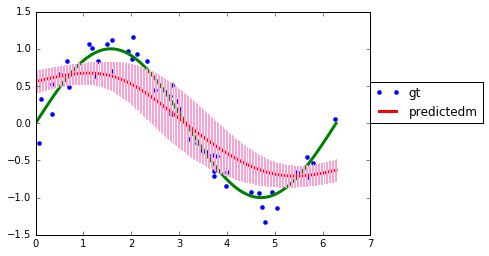

<function __main__.plot_prediction>

In [107]:
def plot_prediction(in_pts=50, sigma_noise=0.15):
    X, T = get_samples(in_pts, sigma_noise)
    plot_sin()

    x = np.linspace(0,2*math.pi,200).reshape(-1,1)
    #y = [predict3(X, T, xx) for xx in x]
    y_mean, y_var = predict3(X, T, x)
    plt.plot(x, y_mean, 'r', linewidth=3, label='predictedm')
    plot_covar(x, y_mean, y_var)

    plt.legend(loc=(1,0.5))
    plt.show()
interact(plot_prediction, in_pts=(10,200), sigma_noise=(0.0, 3.0, 0.1))

It is quite fucking obvious that this guy has too much uncertainty even in places where he has seen the fucking data.    

but then fucking again, the model is an isotropic chut. what the fuck do you fucking expect?